## 第10回レポート課題

日付フォーマットの変換問題を使って, Attention付きseq2seqの学習を行った.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 14[s] | loss 3.09
| epoch 1 |  iter 41 / 351 | time 28[s] | loss 1.90
| epoch 1 |  iter 61 / 351 | time 43[s] | loss 1.72
| epoch 1 |  iter 81 / 351 | time 57[s] | loss 1.46
| epoch 1 |  iter 101 / 351 | time 72[s] | loss 1.19
| epoch 1 |  iter 121 / 351 | time 86[s] | loss 1.14
| epoch 1 |  iter 141 / 351 | time 101[s] | loss 1.09
| epoch 1 |  iter 161 / 351 | time 115[s] | loss 1.06
| epoch 1 |  iter 181 / 351 | time 130[s] | loss 1.04
| epoch 1 |  iter 201 / 351 | time 144[s] | loss 1.03
| epoch 1 |  iter 221 / 351 | time 158[s] | loss 1.02
| epoch 1 |  iter 241 / 351 | time 173[s] | loss 1.02
| epoch 1 |  iter 261 / 351 | time 187[s] | loss 1.01
| epoch 1 |  iter 281 / 351 | time 202[s] | loss 1.00
| epoch 1 |  iter 301 / 351 | time 217[s] | loss 1.00
| epoch 1 |  iter 321

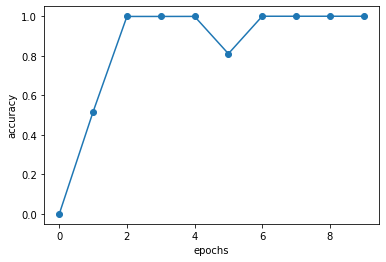

In [4]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch08.attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# データの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 入力文を反転
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model.save_params()

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.show()


何回か実行してみたが, いずれの場合もエポック6で急に正答率が下がった.

次に,　モデルを単純なseq2seqを使って学習を行った.

In [6]:
model = Seq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list2 = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list2.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model.save_params()

x2 = np.arange(len(acc_list2))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 10[s] | loss 3.28
| epoch 1 |  iter 41 / 351 | time 21[s] | loss 1.94
| epoch 1 |  iter 61 / 351 | time 32[s] | loss 1.78
| epoch 1 |  iter 81 / 351 | time 42[s] | loss 1.68
| epoch 1 |  iter 101 / 351 | time 53[s] | loss 1.45
| epoch 1 |  iter 121 / 351 | time 64[s] | loss 1.22
| epoch 1 |  iter 141 / 351 | time 74[s] | loss 1.17
| epoch 1 |  iter 161 / 351 | time 85[s] | loss 1.14
| epoch 1 |  iter 181 / 351 | time 96[s] | loss 1.11
| epoch 1 |  iter 201 / 351 | time 107[s] | loss 1.08
| epoch 1 |  iter 221 / 351 | time 117[s] | loss 1.05
| epoch 1 |  iter 241 / 351 | time 128[s] | loss 1.04
| epoch 1 |  iter 261 / 351 | time 139[s] | loss 1.04
| epoch 1 |  iter 281 / 351 | time 149[s] | loss 1.03
| epoch 1 |  iter 301 / 351 | time 160[s] | loss 1.03
| epoch 1 |  iter 321 / 351 | time 171[s] | loss 1.02
| epoch 1 |  iter 341 / 351 | time 181[s] | loss 1.02
Q 10/15/94                     
T 1994-10-15


最後に, Peekyを用いて学習を行った.

In [7]:
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list3 = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list3.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model.save_params()

x3 = np.arange(len(acc_list3))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 12[s] | loss 2.81
| epoch 1 |  iter 41 / 351 | time 24[s] | loss 1.86
| epoch 1 |  iter 61 / 351 | time 35[s] | loss 1.75
| epoch 1 |  iter 81 / 351 | time 47[s] | loss 1.67
| epoch 1 |  iter 101 / 351 | time 60[s] | loss 1.46
| epoch 1 |  iter 121 / 351 | time 71[s] | loss 1.20
| epoch 1 |  iter 141 / 351 | time 83[s] | loss 1.12
| epoch 1 |  iter 161 / 351 | time 95[s] | loss 1.08
| epoch 1 |  iter 181 / 351 | time 107[s] | loss 1.06
| epoch 1 |  iter 201 / 351 | time 119[s] | loss 1.05
| epoch 1 |  iter 221 / 351 | time 131[s] | loss 1.04
| epoch 1 |  iter 241 / 351 | time 143[s] | loss 1.04
| epoch 1 |  iter 261 / 351 | time 155[s] | loss 1.03
| epoch 1 |  iter 281 / 351 | time 167[s] | loss 1.02
| epoch 1 |  iter 301 / 351 | time 179[s] | loss 1.01
| epoch 1 |  iter 321 / 351 | time 191[s] | loss 1.01
| epoch 1 |  iter 341 / 351 | time 203[s] | loss 1.00
Q 10/15/94                     
T 1994-10-15

以上の結果を図示した.

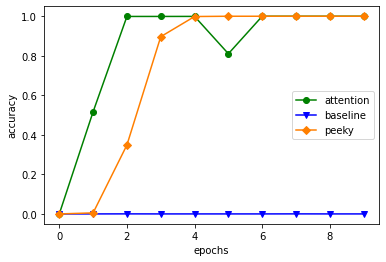

In [9]:
plt.plot(x, acc_list, marker='o', label='attention', color='g')
plt.plot(x2, acc_list2, marker='v', label='baseline', color='b')
plt.plot(x3, acc_list3, marker='D', label='peeky', color='#ff7f00')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.show()

baselineは当てにならないが, この規模のデータの場合, attentionには速度は落ちるものの, 最終的な精度は100%まで上昇した.

### 感想
今回もモデルを視覚的に比較しながら行えたので, 結果が分かりやすかった. attentionの部分で急に正答率が減少したのも含めて, 細かいところが抜けている感じがしたのでよく復習しておきたい.

### 参考文献
斎藤 康毅　『ゼロから作るDeep Learning②自然言語処理編』, 2018, オライリー・ジャパン, p.325-380